In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import PowerTransformer, StandardScaler
import seaborn as sns

In [7]:
# Read a small portion of the file to inspect data types
NFL_data = pd.read_csv("NFL Play by Play 2009-2016 (v3).csv", nrows=100)

# Inspect the data types
print(NFL_data.dtypes)

# After determining the correct data types, read the full file with dtype specification
dtype_spec = {25: 'str', 51: 'str'}  # Adjust based on the inspection
NFL_data = pd.read_csv("NFL Play by Play 2009-2016 (v3).csv", dtype=dtype_spec, low_memory=False)

Date         object
GameID        int64
Drive         int64
qtr           int64
down        float64
             ...   
Win_Prob    float64
WPA         float64
airWPA      float64
yacWPA      float64
Season        int64
Length: 102, dtype: object


In [9]:
NFL_data = NFL_data.convert_dtypes().select_dtypes("number")

In [11]:
NFL_data.head(5)

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009091000,1,1,<NA>,15,3600,0,30,30,0,...,<NA>,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,<NA>,<NA>,2009
1,2009091000,1,1,1,15,3593,7,42,58,10,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009091000,1,1,2,15,3556,37,47,53,5,...,<NA>,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,<NA>,<NA>,2009
3,2009091000,1,1,3,14,3515,41,44,56,8,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009091000,1,1,4,14,3507,8,44,56,8,...,<NA>,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,<NA>,<NA>,2009


In [13]:
NFL_data.tail(5)

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
362442,2017010102,20,4,1,1,22,6,35,35,10,...,0.0,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,0.041534,0.0,2016
362443,2017010102,20,4,<NA>,1,13,9,15,15,0,...,<NA>,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,<NA>,<NA>,2016
362444,2017010102,21,4,<NA>,1,13,0,35,35,0,...,<NA>,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,<NA>,<NA>,2016
362445,2017010102,21,4,1,1,12,1,46,46,10,...,<NA>,0.035708,0.964292,0.0,1.0,0.964292,0.035708,<NA>,<NA>,2016
362446,2017010102,21,4,<NA>,0,0,12,46,46,0,...,<NA>,0.0,1.0,0.0,1.0,0.934245,0.0,<NA>,<NA>,2016


In [15]:
#using display.max_columns for showing all the columns
pd.set_option('display.max_columns', None)
NFL_data.head()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009091000,1,1,<NA>,15,3600,0,30,30,0,0,0,<NA>,1,39,0,0,0,0,0,0,0,0,0,0,0,<NA>,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.2137,0.003592,0.313676,0.0,0.0,0.323526,2.014474,<NA>,<NA>,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,<NA>,<NA>,2009
1,2009091000,1,1,1,15,3593,7,42,58,10,5,0,0,1,5,0,0,0,0,1,-3,8,0,0,0,1,<NA>,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.2937,0.003638,0.423011,0.0,0.0,2.338,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009091000,1,1,2,15,3556,37,47,53,5,2,0,0,1,-3,0,0,0,0,0,0,0,0,0,1,0,<NA>,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.40276,<NA>,<NA>,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,<NA>,<NA>,2009
3,2009091000,1,1,3,14,3515,41,44,56,8,2,0,0,1,0,0,0,0,0,1,34,0,0,0,0,0,<NA>,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009091000,1,1,4,14,3507,8,44,56,8,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,<NA>,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,0.001861,0.21348,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,<NA>,<NA>,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,<NA>,<NA>,2009


In [17]:
NFL_data.count()

GameID       362447
Drive        362447
qtr          362447
down         308229
TimeUnder    362447
              ...  
Win_Prob     340454
WPA          357630
airWPA       141709
yacWPA       141491
Season       362447
Length: 64, dtype: int64

In [19]:
NFL_data.shape

(362447, 64)

In [21]:
NFL_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Data columns (total 64 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   GameID                       362447 non-null  Int64  
 1   Drive                        362447 non-null  Int64  
 2   qtr                          362447 non-null  Int64  
 3   down                         308229 non-null  Int64  
 4   TimeUnder                    362447 non-null  Int64  
 5   TimeSecs                     362259 non-null  Int64  
 6   PlayTimeDiff                 362073 non-null  Int64  
 7   yrdln                        361724 non-null  Int64  
 8   yrdline100                   361724 non-null  Int64  
 9   ydstogo                      362447 non-null  Int64  
 10  ydsnet                       362447 non-null  Int64  
 11  GoalToGo                     361724 non-null  Int64  
 12  FirstDown                    336850 non-null  Int64  
 13 

In [23]:

NFL_data.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,362447.0,362447.0,362447.0,308229.0,362447.0,362259.0,362073.0,361724.0,361724.0,362447.0,362447.0,361724.0,336850.0,362447.0,362447.0,362447.0,362447.0,362447.0,362447.0,362447.0,362447.0,362447.0,362447.0,362447.0,362447.0,362447.0,7919.0,362447.0,362447.0,362447.0,362447.0,362447.0,338765.0,338765.0,340472.0,338765.0,362447.0,362447.0,362447.0,362447.0,362447.0,362447.0,362299.0,362299.0,362299.0,362299.0,362299.0,362299.0,362299.0,362447.0,362447.0,362299.0,362125.0,141806.0,141713.0,340504.0,340504.0,339087.0,339087.0,340454.0,357630.0,141709.0,141491.0,362447.0
mean,2012664429.993891,12.347088,2.578231,2.001226,7.386076,1695.234346,20.574649,28.413542,48.616807,7.305236,25.907895,0.049422,0.291183,1.0,5.034595,0.072171,0.029166,0.000392,0.001368,0.412882,3.271648,1.253747,0.052355,0.011215,0.296452,0.248566,37.379341,0.014272,0.027094,0.008227,0.071969,0.608792,10.257134,11.474904,-1.191217,7.830319,0.041134,2.519651,2.540589,2.514224,2.520297,2.493382,0.127559,0.094798,0.002514,0.140266,0.243912,0.002635,0.296208,0.02435,0.00069,1.564915,0.020177,0.526933,-0.386522,0.533889,0.466561,0.534217,0.466185,0.501311,0.002163,0.015209,-0.010492,2012.522071
std,2292258.152951,7.168173,1.130259,1.006003,4.642132,1063.065717,18.030486,13.002355,25.161965,4.863445,24.859579,0.216747,0.454308,0.0,9.144627,0.25877,0.168271,0.01979,0.036968,0.492353,7.511632,4.199049,0.222743,0.105308,0.456693,0.432182,10.306545,0.118612,0.162356,0.090331,0.258437,2.607951,9.460576,9.946084,10.791503,7.477384,0.198601,0.77892,0.760446,0.781086,0.780078,0.800497,0.199399,0.072123,0.003458,0.110672,0.158945,0.001462,0.167838,0.15224,0.018059,1.752432,1.33172,1.39209,1.972964,0.286415,0.286468,0.288647,0.288694,0.288207,0.045326,0.056422,0.067972,2.290084
min,2009091000.0,1.0,1.0,1.0,0.0,-900.0,0.0,1.0,1.0,0.0,-87.0,0.0,0.0,1.0,-74.0,0.0,0.0,0.0,0.0,0.0,-70.0,-81.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-59.0,0.0,0.0,0.0,-3.0,-1.0,-3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.836488,-13.494136,-12.849594,-14.0,0.0,0.0,0.0,0.0,0.0,-0.997214,-0.999881,-0.986673,2009.0
25%,2011091106.0,6.0,2.0,1.0,3.0,778.0,5.0,20.0,30.0,3.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,-7.0,3.0,0.0,2.0,2.0,2.0,2.0,2.0,0.002803,0.034652,0.000104,0.039944,0.152578,0.00189,0.191605,0.0,0.0,0.323526,-0.598006,-0.498824,-0.964562,0.323129,0.230595,0.319464,0.226867,0.274964,-0.014589,-0.011355,-0.018623,2011.0
50%,2013090806.0,12.0,3.0,2.0,7.0,1800.0,17.0,30.0,49.0,9.0,19.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,7.0,10.0,0.0,7.0,0.0,3.0,3.0,3.0,3.0,3.0,0.024801,0.083128,0.000987,0.124091,0.23022,0.002991,0.313676,0.0,0.0,1.262867,0.0,0.300335,0.0,0.531286,0.46904,0.533689,0.466617,0.504349,0.0,0.003557,0.0,2013.0
75%,2015091306.0,18.0,4.0,3.0,11.0,2585.0,37.0,39.0,70.0,10.0,43.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,17.0,17.0,4.0,11.0,0.0,3.0,3.0,3.0,3.0,3.0,0.171999,0.150325,0.003884,0.226935,0.32613,0.00358,0.407969,0.0,0.0,2.887211,0.565713,1.386647,0.484913,0.770011,0.677566,0.773729,0.681018,0.726995,0.0148,0.035702,0.011371,2015.0
max,2017010115.0,35.0,5.

In [25]:
NFL_data.isna()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
362443,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False
362444,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [27]:
# Calculate the number of missing values in each column
missing_values = NFL_data.isna().sum()

In [29]:
# Convert to DataFrame for better formatting
missing_values_NFL_data = missing_values.reset_index()
missing_values_NFL_data.columns = ['Column', 'Missing Values']

# Display the first 20 rows for inspection
print(missing_values_NFL_data.head(60))

# Save the results to a CSV file for complete inspection
missing_values_NFL_data.to_csv('missing_values_summary.csv', index=False)

                         Column  Missing Values
0                        GameID               0
1                         Drive               0
2                           qtr               0
3                          down           54218
4                     TimeUnder               0
5                      TimeSecs             188
6                  PlayTimeDiff             374
7                         yrdln             723
8                    yrdline100             723
9                       ydstogo               0
10                       ydsnet               0
11                     GoalToGo             723
12                    FirstDown           25597
13                PlayAttempted               0
14                 Yards.Gained               0
15                           sp               0
16                    Touchdown               0
17                       Safety               0
18                   Onsidekick               0
19                  PassAttempt         

In [31]:
NFL_data.dropna()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [33]:
NFL_data.shape

(362447, 64)

In [35]:
#filling in

In [37]:
mean_imputer = SimpleImputer(strategy='mean')
NFL_data_2 = mean_imputer.set_output(transform="pandas").fit_transform(NFL_data)
NFL_data_2.head()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.009091e+09,1.0,1.0,2.001226,15.0,3600.0,0.0,30.0,30.0,0.0,0.0,0.0,0.291183,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,0.526933,-0.386522,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.015209,-0.010492,2009.0
1,2.009091e+09,1.0,1.0,1.000000,15.0,3593.0,7.0,42.0,58.0,10.0,5.0,0.0,0.000000,1.0,5.0,0.0,0.0,0.0,0.0,1.0,-3.0,8.0,0.0,0.0,0.0,1.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,2.009091e+09,1.0,1.0,2.000000,15.0,3556.0,37.0,47.0,53.0,5.0,2.0,0.0,0.000000,1.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,0.526933,-0.386522,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.015209,-0.010492,2009.0
3,2.009091e+09,1.0,1.0,3.000000,14.0,3515.0,41.0,44.0,56.0,8.0,2.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.009091e+09,1.0,1.0,4.000000,14.0,3507.0,8.0,44.0,56.0,8.0,2.0,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,0.526933,-0.386522,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.015209,-0.010492,2009.0


In [39]:
NFL_data_2.isna().sum()

GameID       0
Drive        0
qtr          0
down         0
TimeUnder    0
            ..
Win_Prob     0
WPA          0
airWPA       0
yacWPA       0
Season       0
Length: 64, dtype: int64

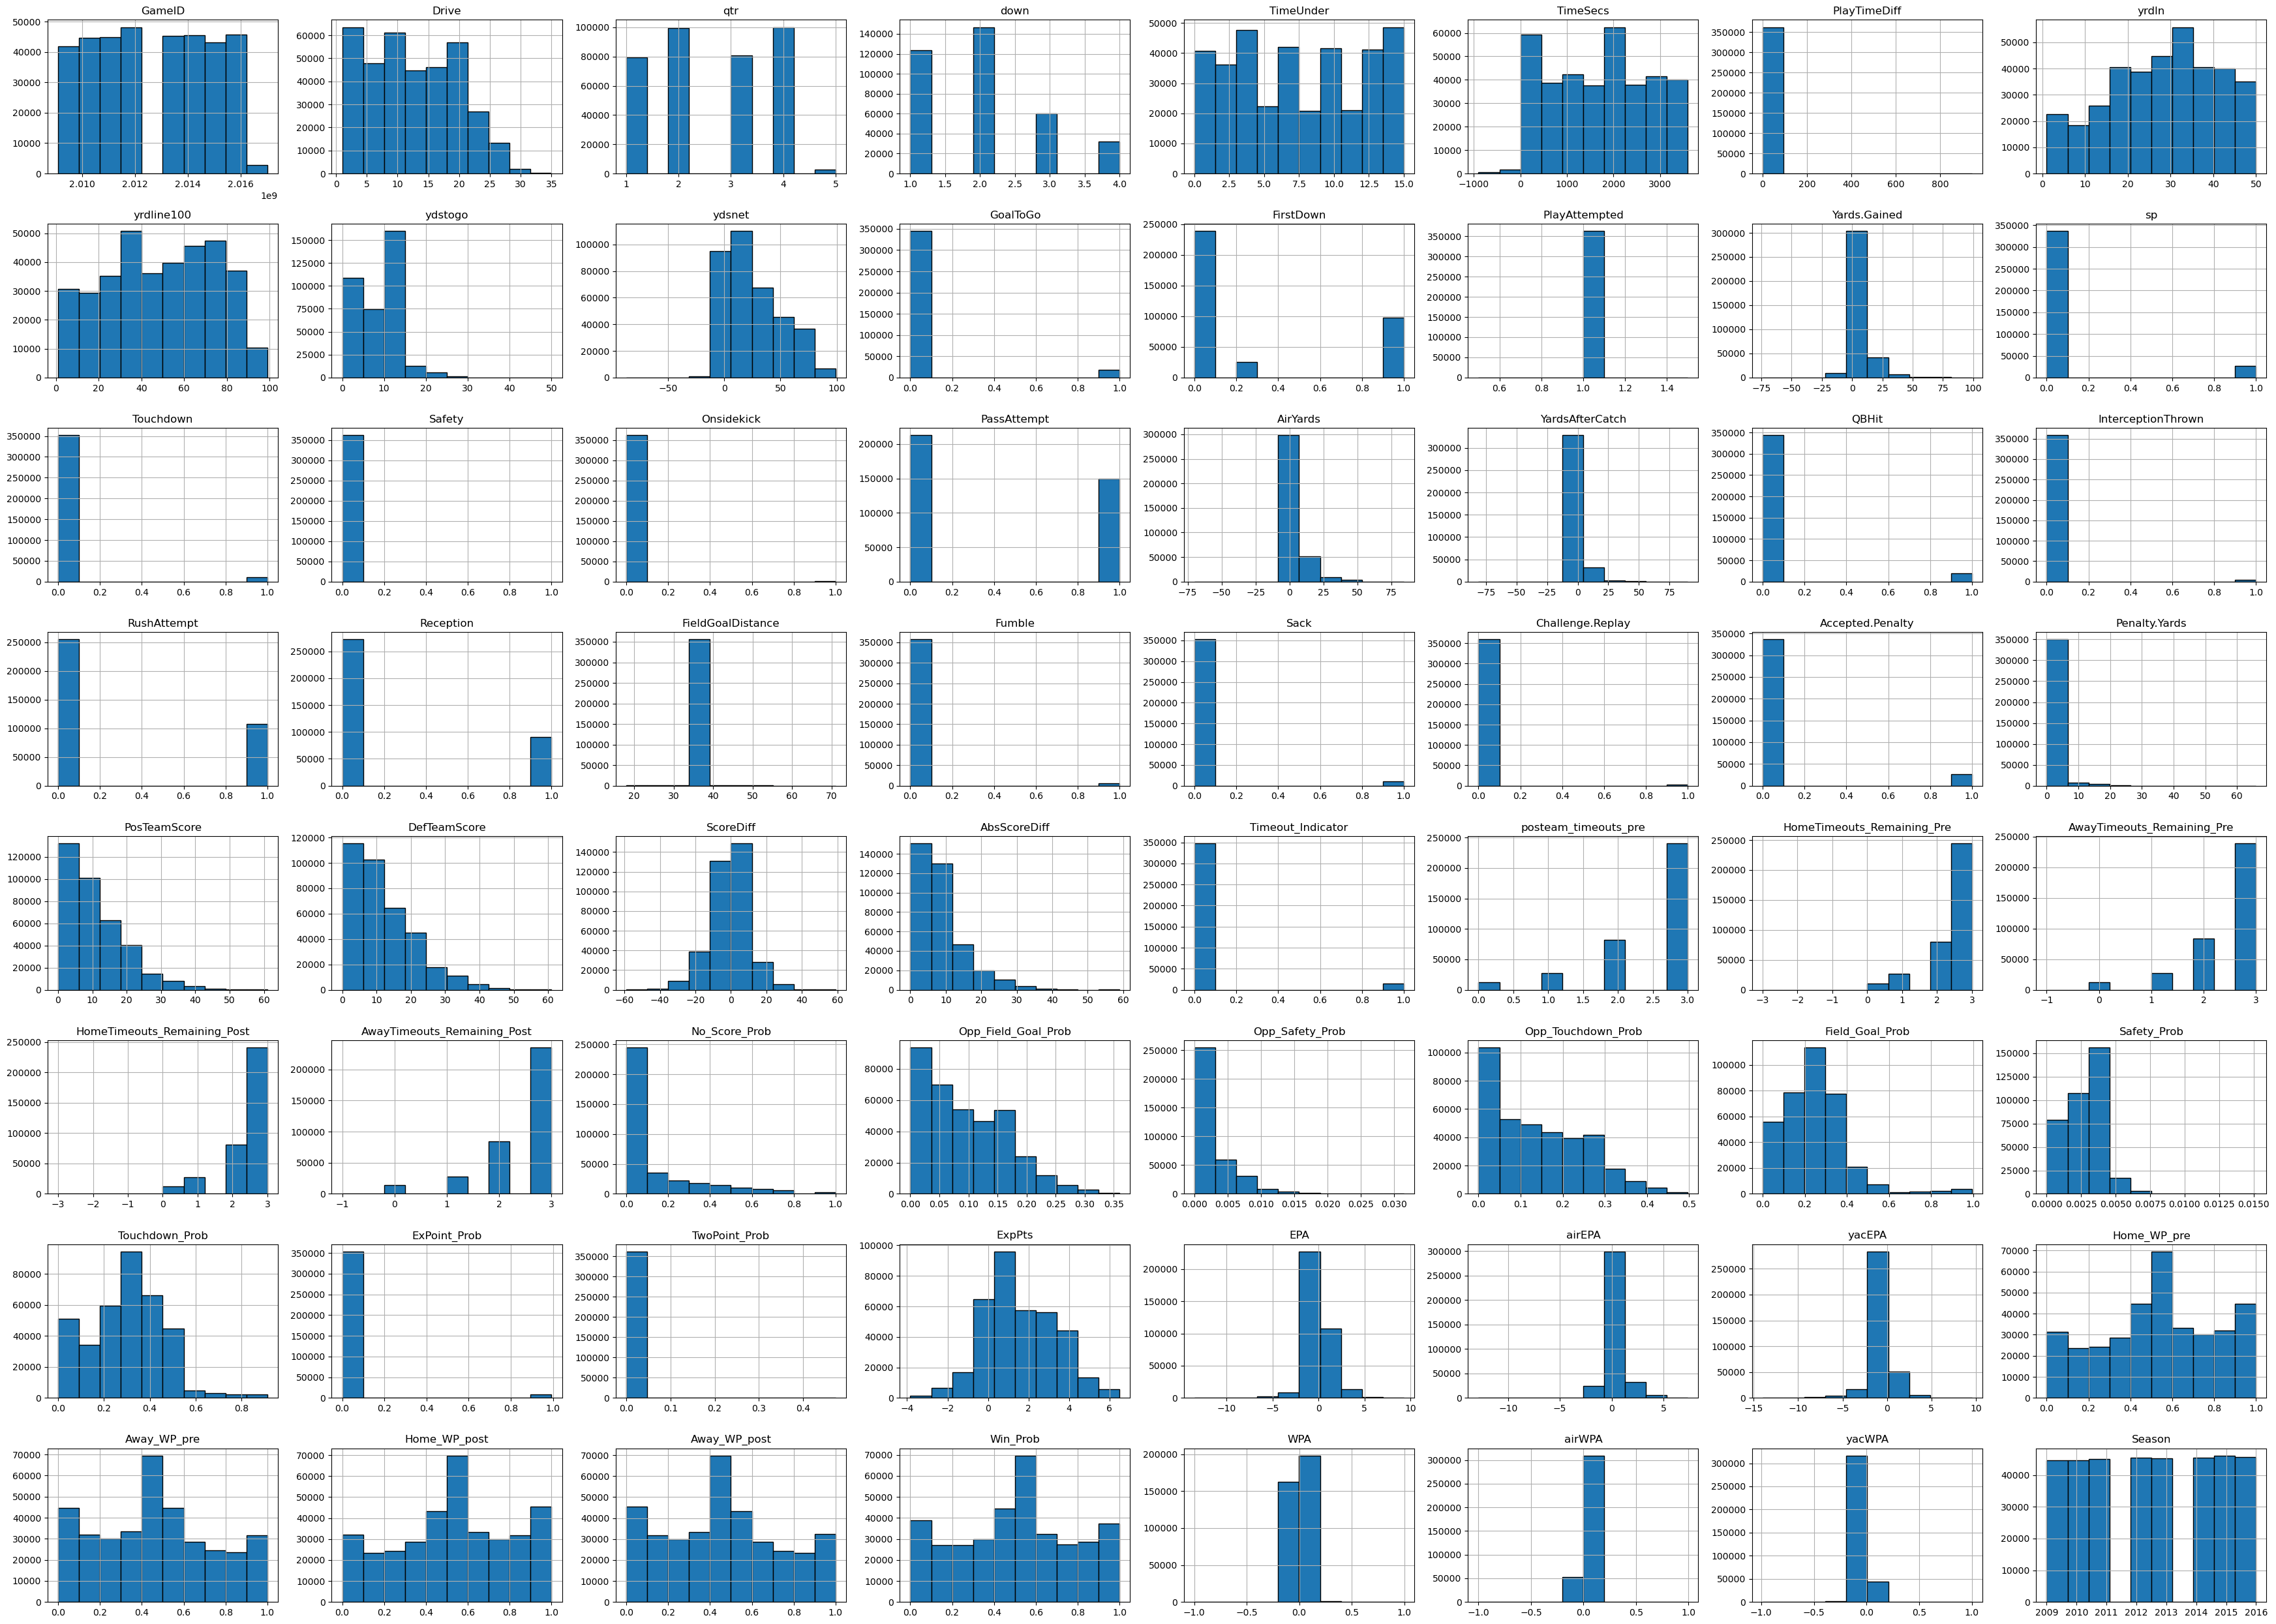

In [41]:
# Create histograms for visluaize the distribution of variables
NFL_data_2.hist(figsize=(35, 25), bins=10, edgecolor='black')

# Display the plots
plt.tight_layout()
plt.show()

In [43]:
#Detecting Outliers


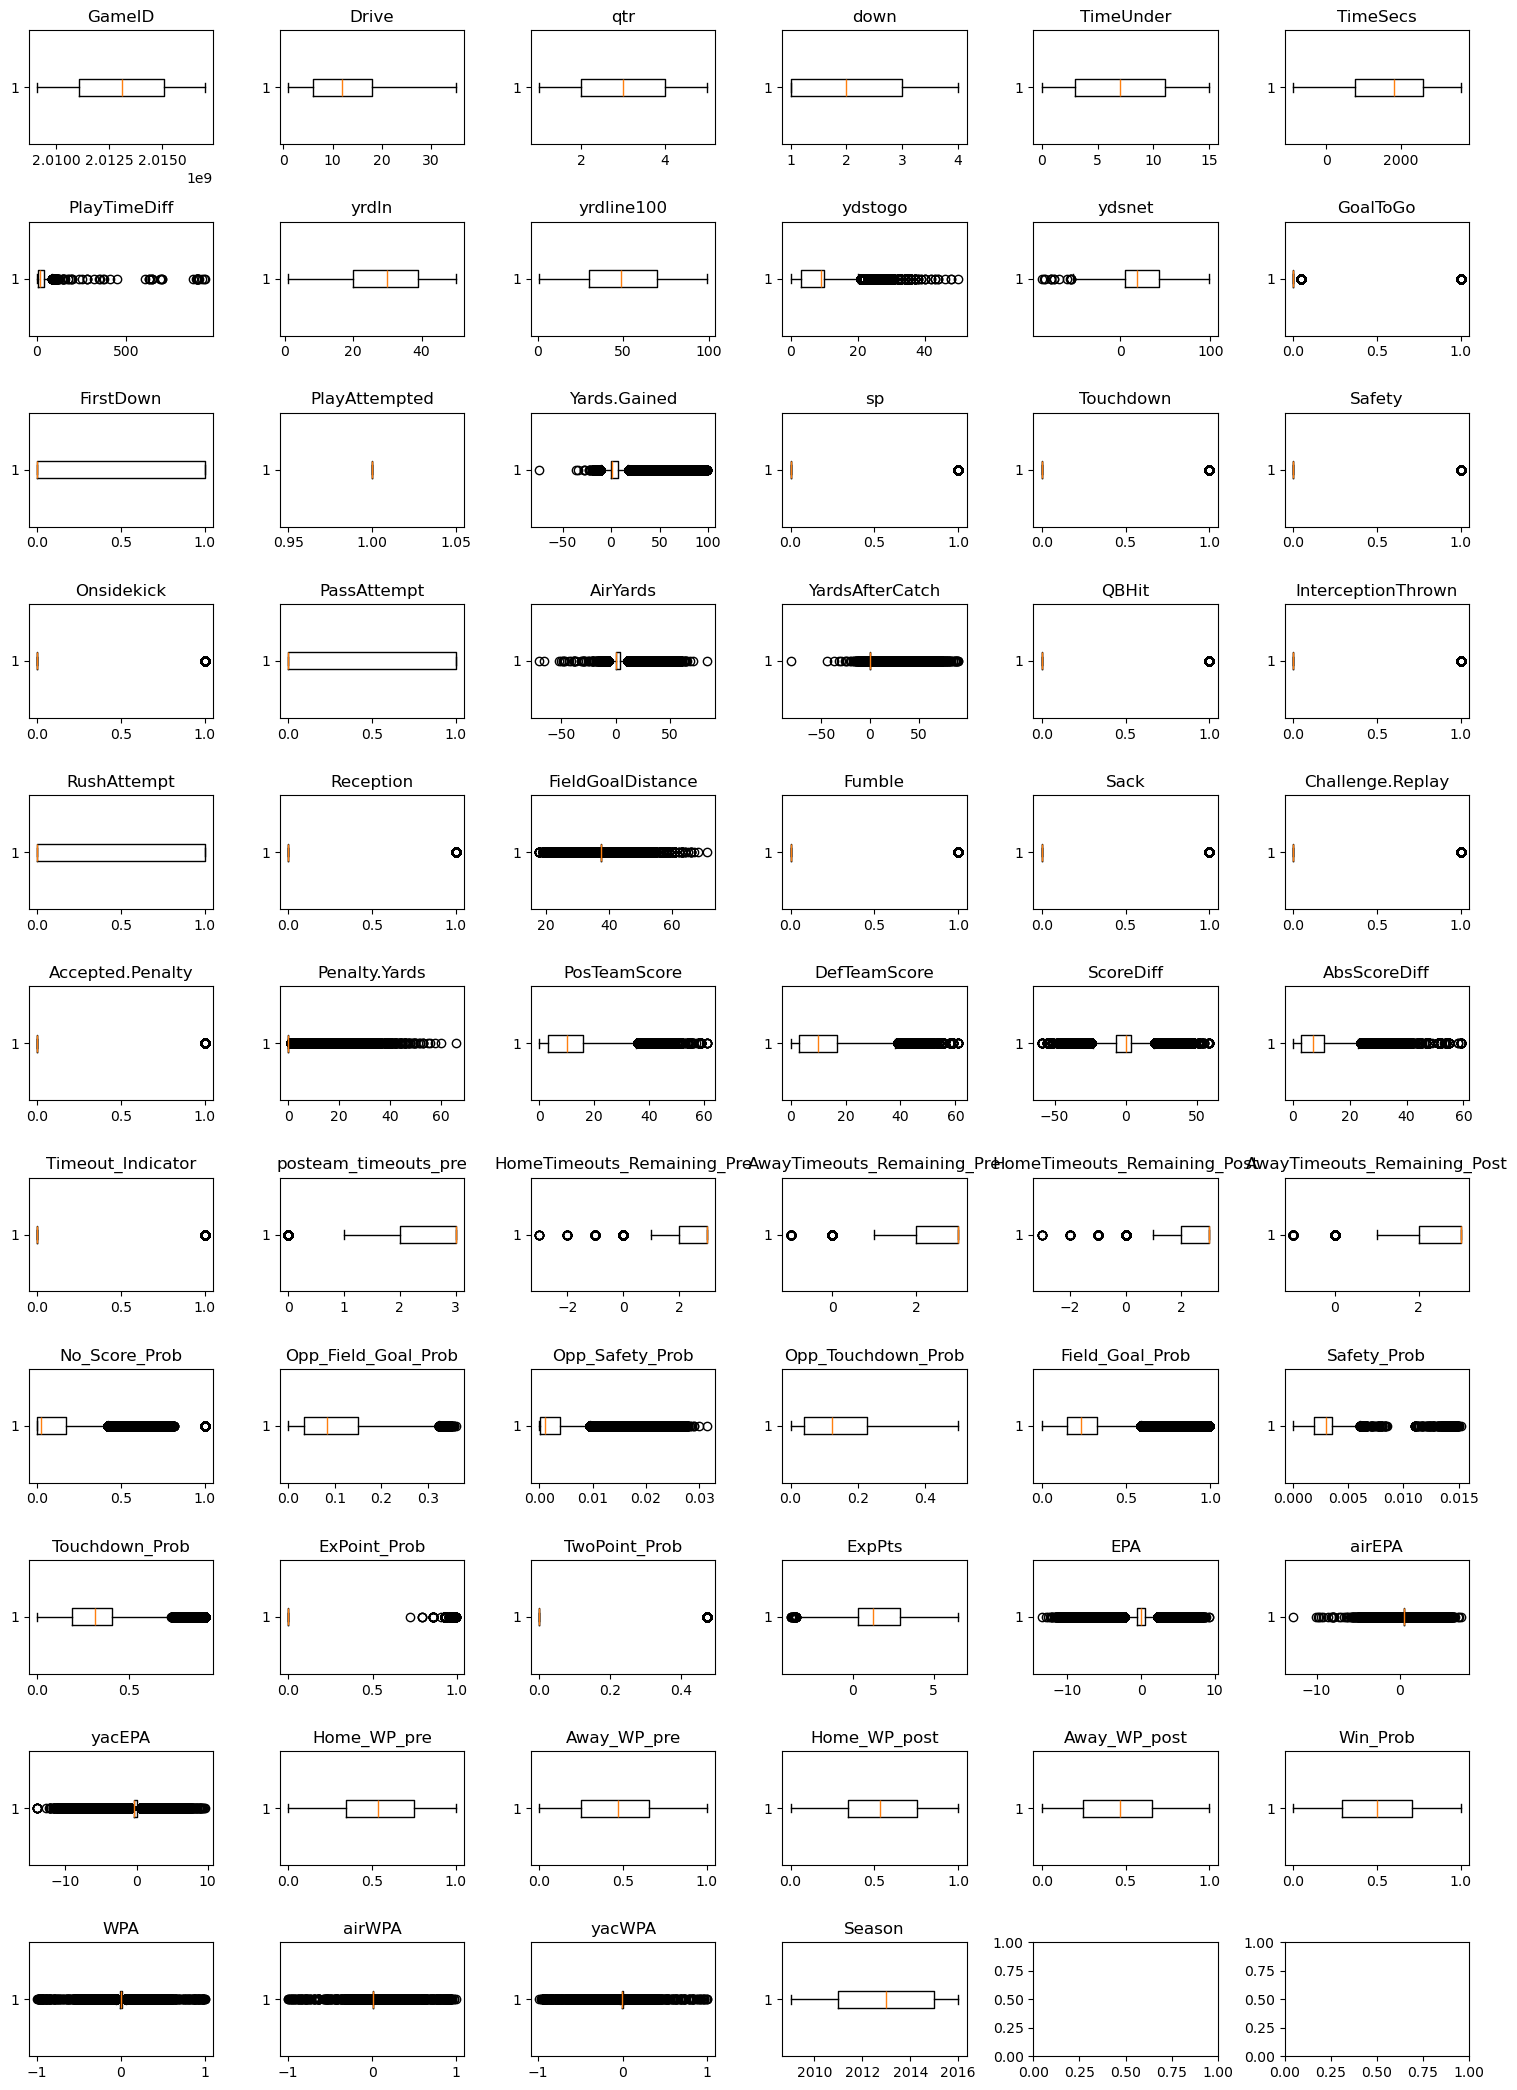

In [45]:
fig, axes = plt.subplots(11,6,figsize=(15,3*7), tight_layout=True)

for ax, col in zip(axes.flat, NFL_data_2.columns):
    
    ax.boxplot(NFL_data_2[col], vert=False)
    ax.set_title(col)
    
plt.show()

In [49]:
#REMOVING OUTLIERS

In [51]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = NFL_data_2.quantile(0.25)
Q3 = NFL_data_2.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the dataset to remove outliers
NFL_data_no_outliers = NFL_data_2[~((NFL_data_2 < lower_bound) | (NFL_data_2 > upper_bound)).any(axis=1)]

NFL_data_no_outliers.head()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,FieldGoalDistance,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
2,2.009091e+09,1.0,1.0,2.0,15.0,3556.0,37.0,47.0,53.0,5.0,2.0,0.0,0.0,1.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,0.526933,-0.386522,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.015209,-0.010492,2009.0
11,2.009091e+09,3.0,1.0,1.0,11.0,3321.0,27.0,30.0,30.0,10.0,12.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.001305,0.046332,0.000083,0.071180,0.363390,0.002996,0.514713,0.0,0.0,4.061731,-0.542287,0.526933,-0.386522,0.615159,0.384841,0.597822,0.402178,0.615159,-0.017337,0.015209,-0.010492,2009.0
17,2.009091e+09,4.0,1.0,1.0,8.0,3144.0,33.0,22.0,22.0,10.0,70.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.002055,0.035113,0.000039,0.053521,0.375591,0.002738,0.530943,0.0,0.0,4.368785,-0.234490,0.526933,-0.386522,0.368797,0.631203,0.376194,0.623806,0.631203,-0.007397,0.015209,-0.010492,2009.0
21,2.009091e+09,5.0,1.0,1.0,7.0,3104.0,4.0,27.0,73.0,10.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.009629,0.151594,0.003642,0.232451,0.241638,0.003563,0.357484,0.0,0.0,1.145208,-0.593971,0.526933,-0.386522,0.528421,0.471579,0.511082,0.488918,0.528421,-0.017339,0.015209,-0.010492,2009.0
22,2.009091e+09,5.0,1.0,2.0,7.0,3069.0,35.0,28.0,72.0,9.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.379341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,0.011256,0.171615,0.004378,0.263104,0.227868,0.003897,0.317882,0.0,0.0,0.551237,-0.632618,0.526933,-0.386522,0.511082,0.488918,0.491891,0.508109,0.511082,-0.019192,0.015209,-0.010492,2009.0


In [53]:
#BOXPLOT OF REMOVED OUTLIERS

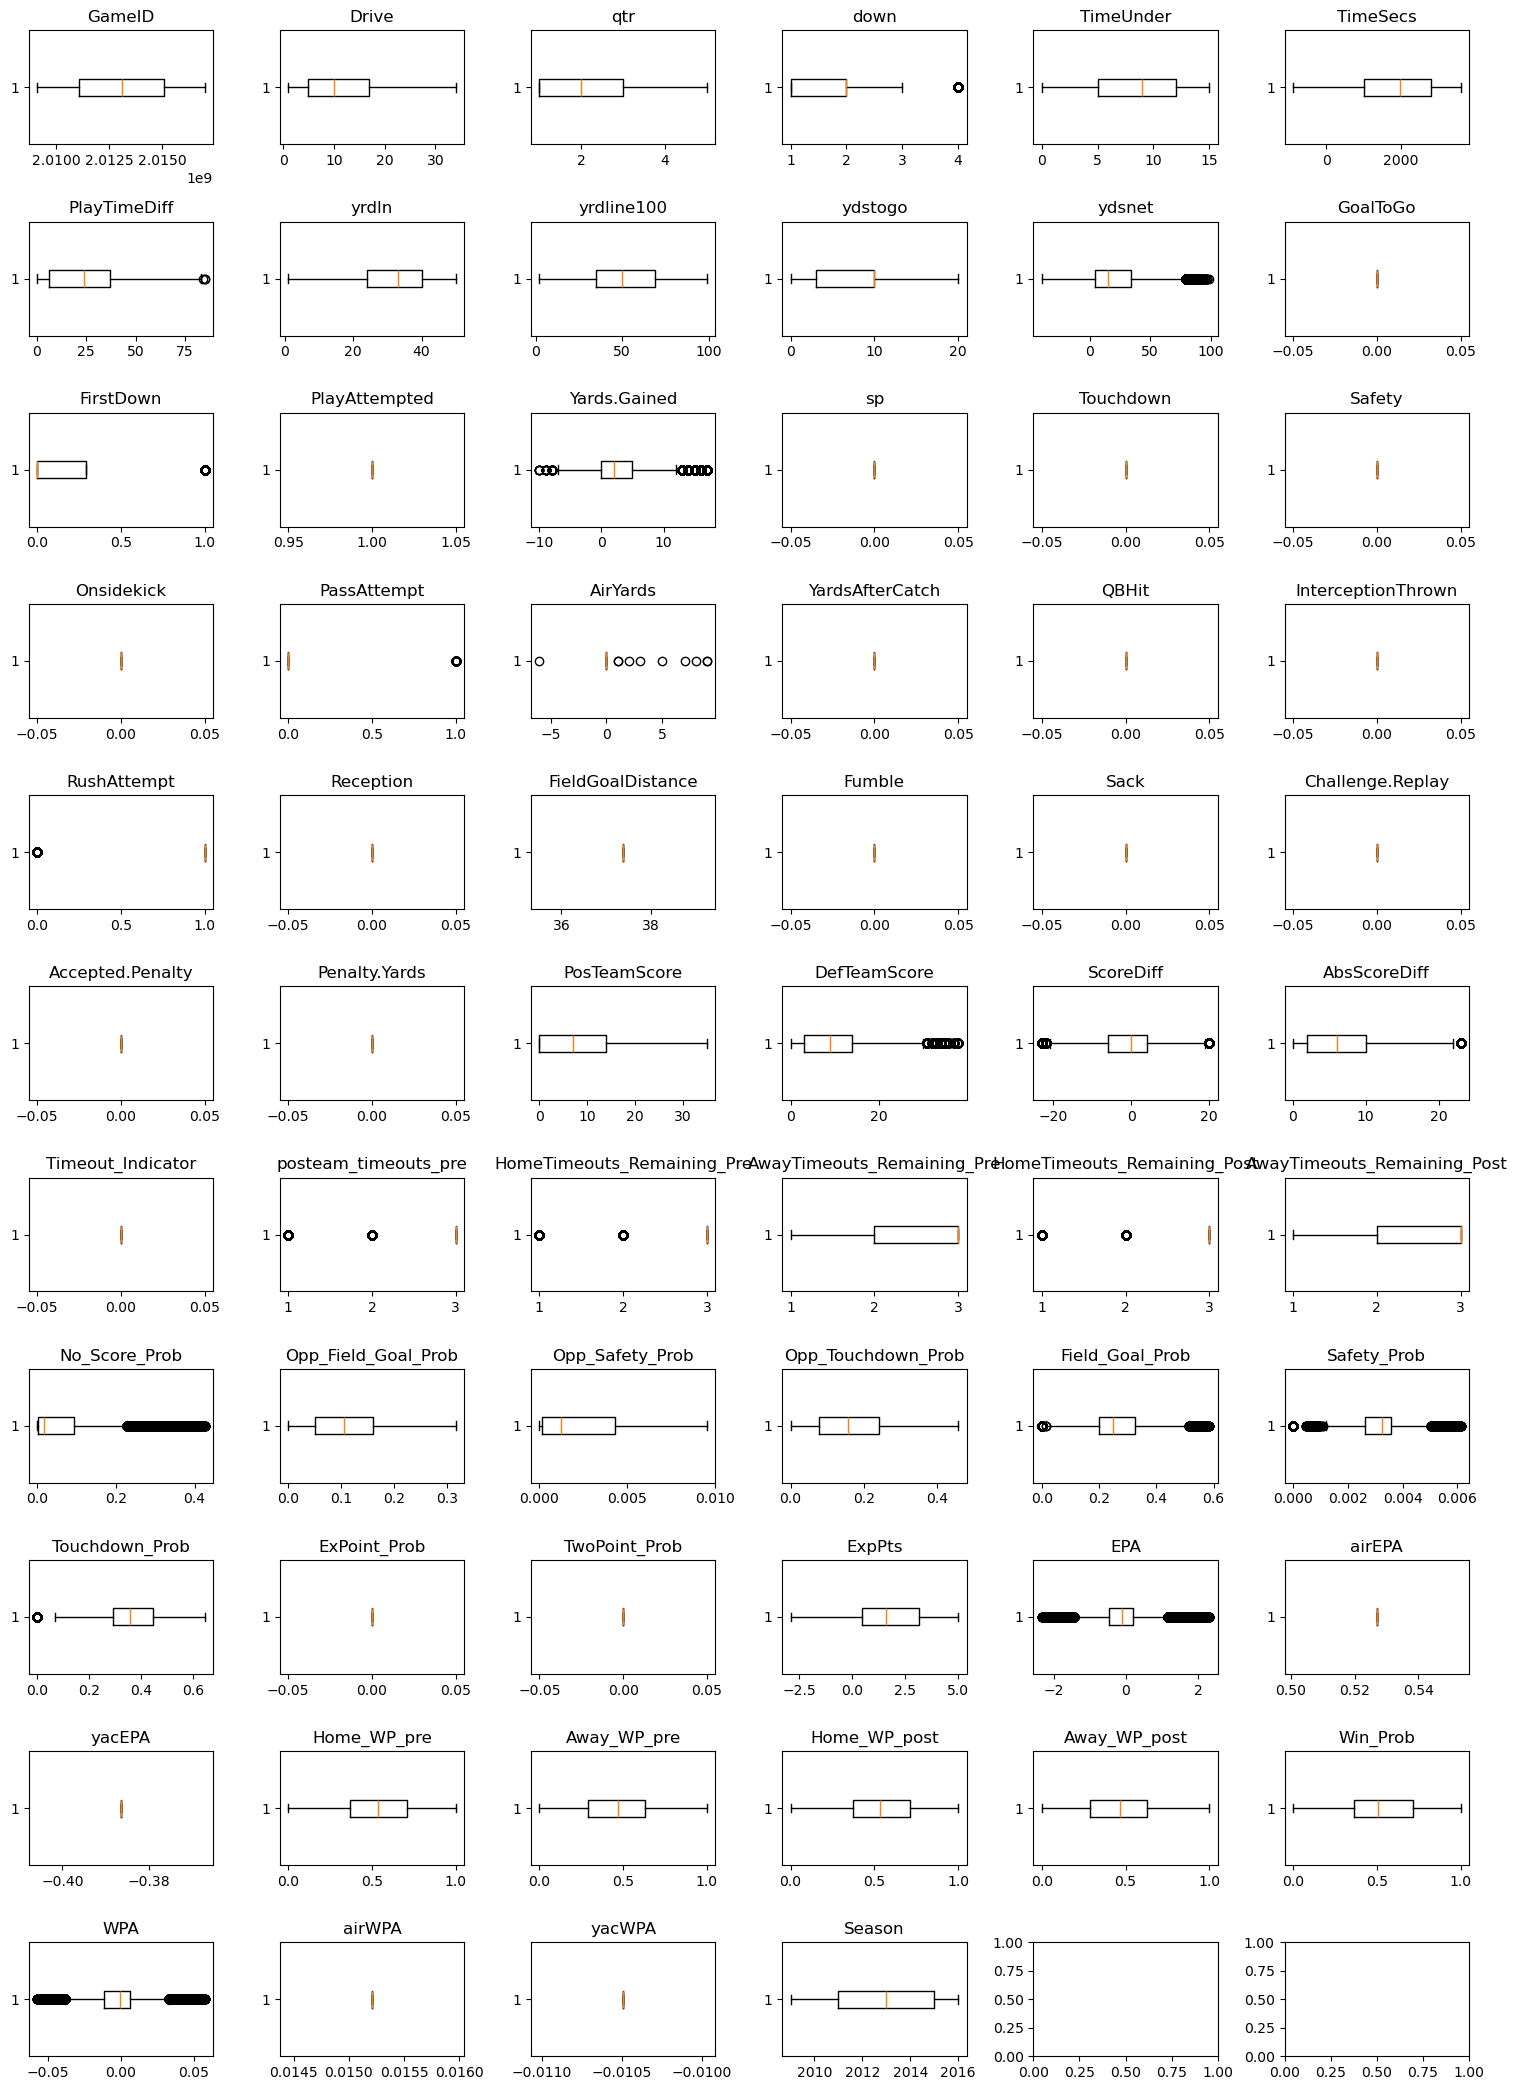

In [55]:
fig, axes = plt.subplots(11,6,figsize=(15,3*7), tight_layout=True)

for ax, col in zip(axes.flat, NFL_data_no_outliers.columns):
    
    ax.boxplot(NFL_data_no_outliers[col], vert=False)
    ax.set_title(col)
    
plt.show()

In [57]:
#Visualization

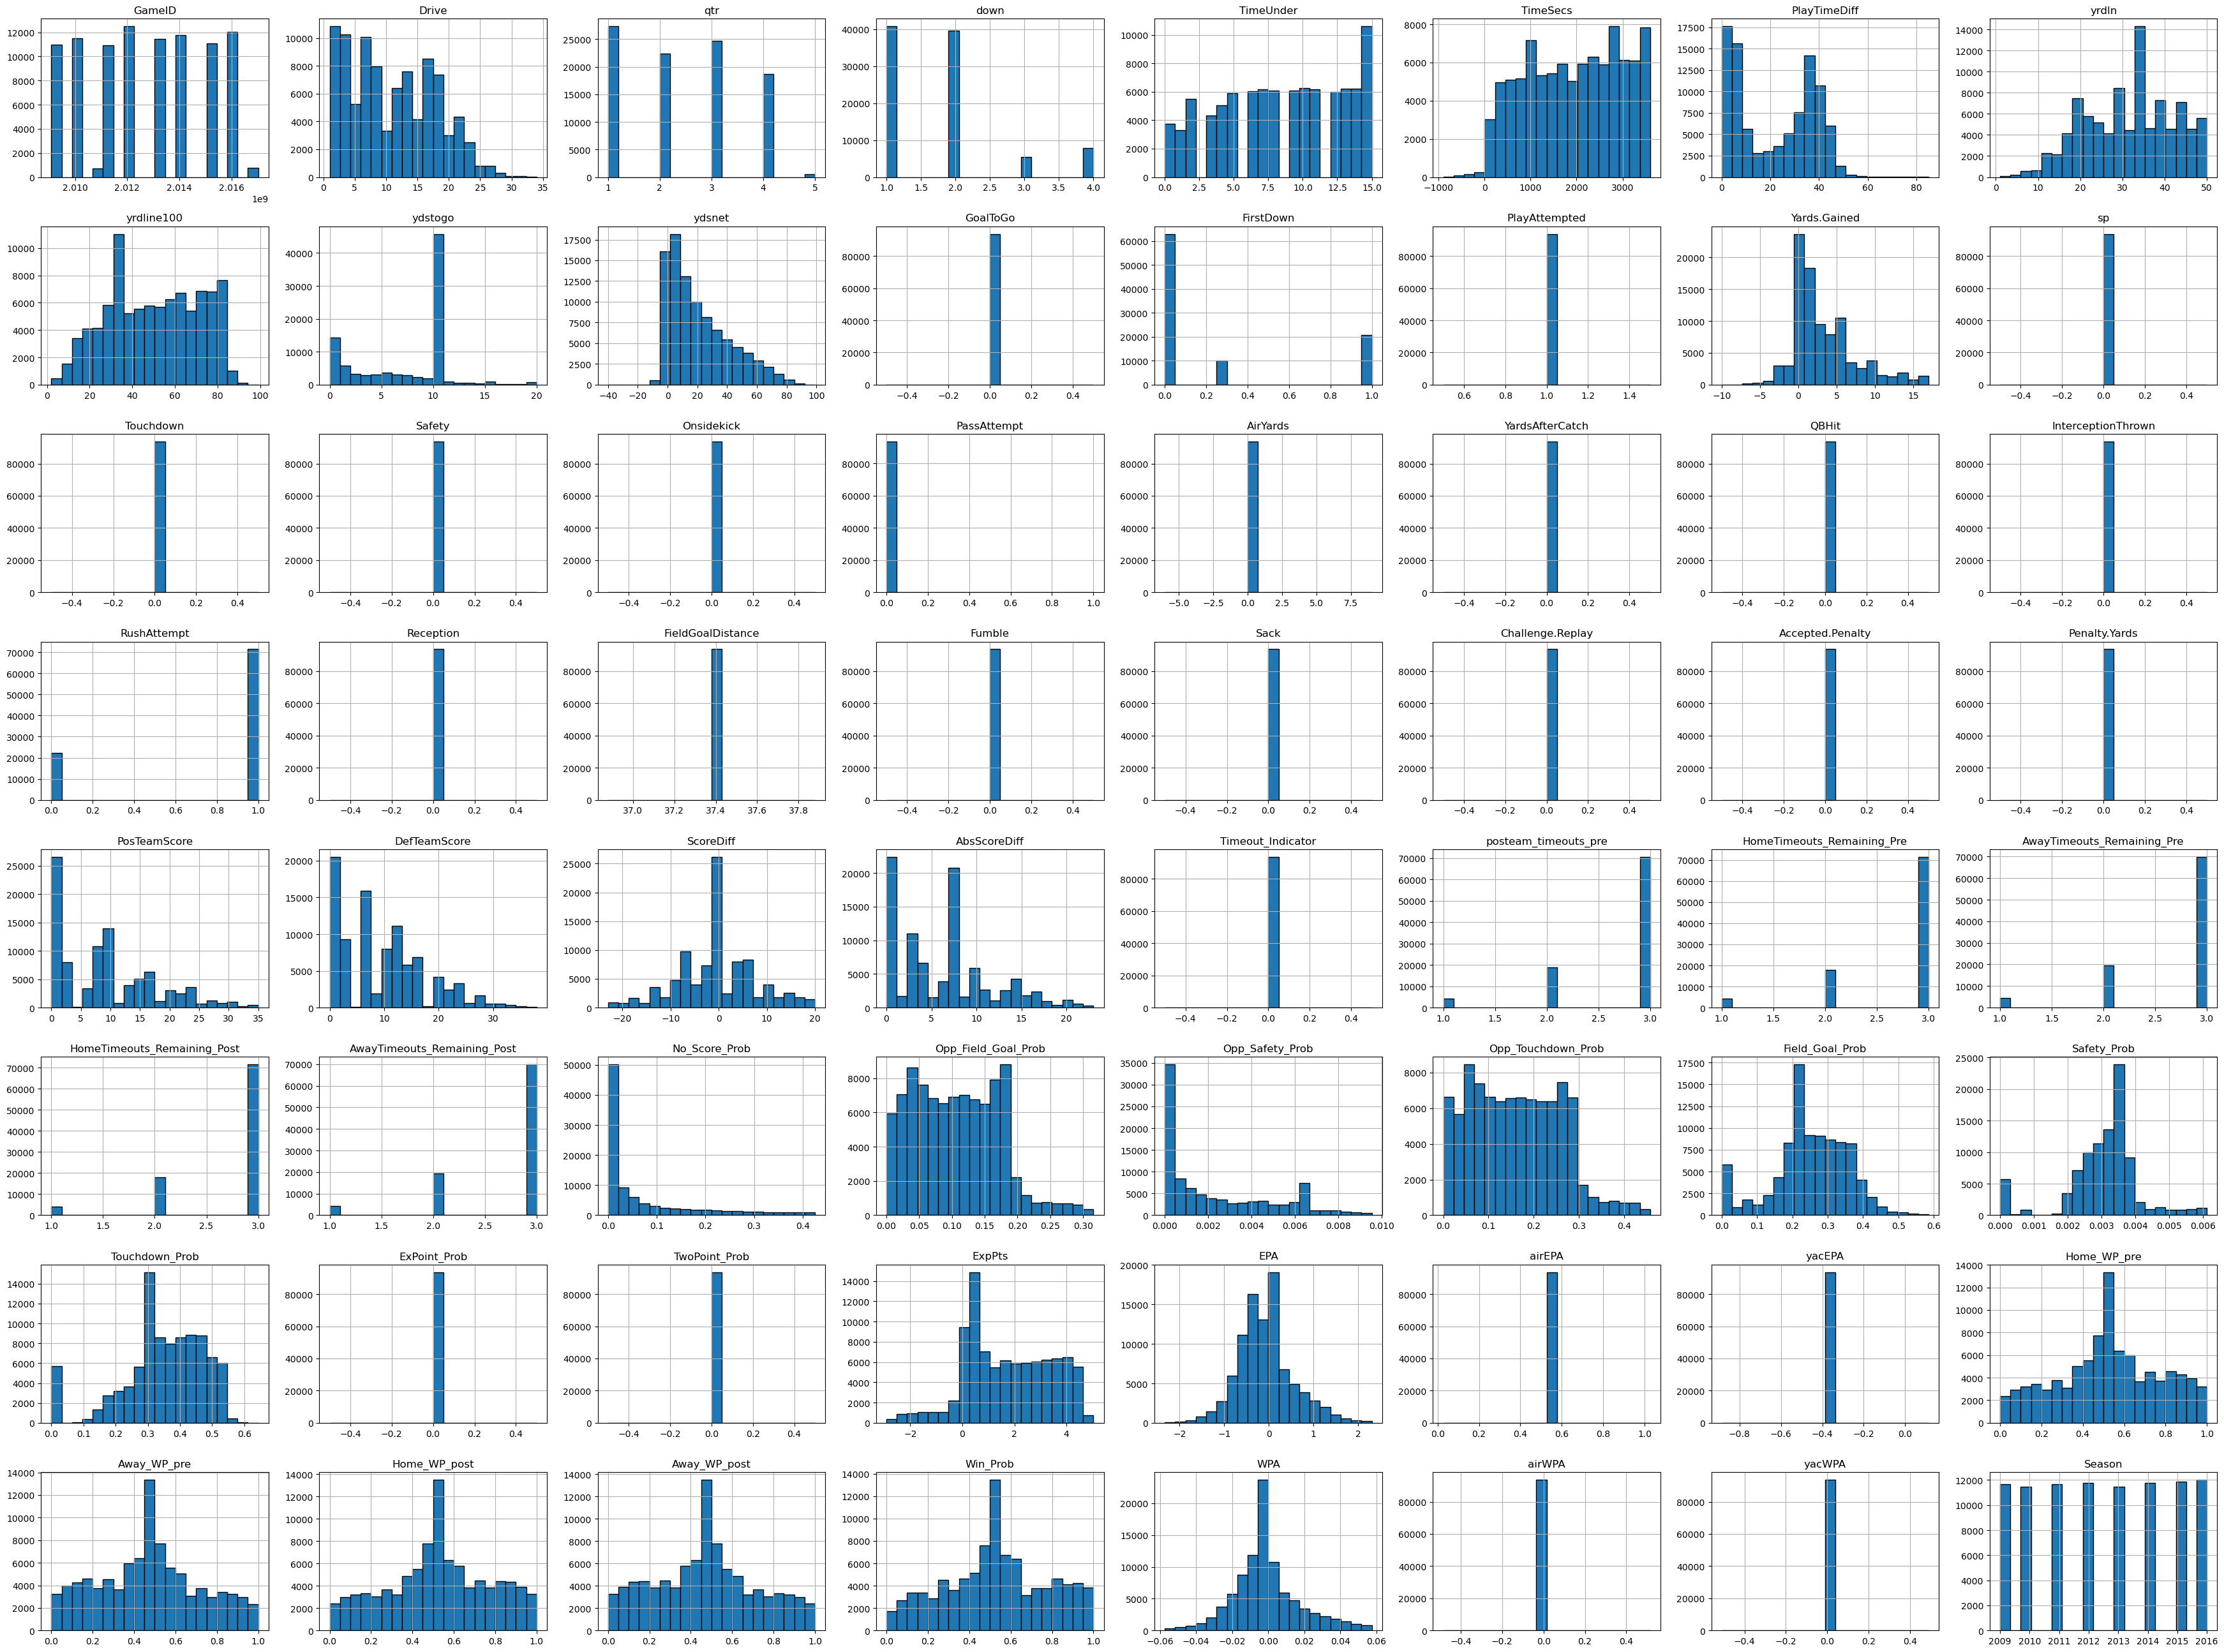

In [61]:
# Create histograms for visluaize the distribution of variables
NFL_data_no_outliers.hist(figsize=(35, 26), bins=20, edgecolor='black')

# Display the plots
plt.tight_layout()
plt.show()

In [63]:
#Save the cleaned Data

In [67]:
cleaned_data_filename = "cleaned_NFL Play by Play 2009-2016 (v3).csv"
NFL_data.to_csv(cleaned_data_filename, index=False)

print(f"Cleaned data saved to {cleaned_data_filename}")

Cleaned data saved to cleaned_NFL Play by Play 2009-2016 (v3).csv
